In [1]:
import urllib3
import certifi

http = urllib3.PoolManager(
    cert_reqs='CERT_REQUIRED',
    ca_certs=certifi.where()
    )

In [2]:
#import requests
#import json

#r = http.request('GET', 'https://opendata.arcgis.com/datasets/aba010cff7fe4d4cb369a54b56cd7544_45.geojson')
#r.status

#def get_data():
#    openweather = "https://opendata.arcgis.com/datasets/aba010cff7fe4d4cb369a54b56cd7544_45.geojson"
#    request_data = requests.get(openweather)
#    return request_data.json()

#data = get_data()

#with open('Building_Energy_Benchmarks.json', 'w', encoding='utf-8') as f:
#    json.dump(data, f, ensure_ascii=False, indent=4)

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('https://opendata.arcgis.com/datasets/aba010cff7fe4d4cb369a54b56cd7544_45.csv')

In [5]:
df.shape

(15741, 71)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15741 entries, 0 to 15740
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               15741 non-null  float64
 1   Y                               15741 non-null  float64
 2   OBJECTID                        15741 non-null  int64  
 3   PID                             15741 non-null  object 
 4   DCREALPROPERTYID                15741 non-null  object 
 5   PMPROPERTYID                    12929 non-null  float64
 6   PROPERTYNAME                    12826 non-null  object 
 7   PMPARENTPROPERTYID              710 non-null    float64
 8   PARENTPROPERTYNAME              710 non-null    object 
 9   REPORTINGYEAR                   15741 non-null  int64  
 10  REPORTSTATUS                    15741 non-null  object 
 11  ADDRESSOFRECORD                 15738 non-null  object 
 12  OWNEROFRECORD                   

In [7]:
f = pd.melt(df, id_vars=['PID', 'DCREALPROPERTYID','WARD','POSTALCODE','YEARBUILT','REPORTINGYEAR','REPORTSTATUS','PRIMARYPROPERTYTYPE_SELFSELECT','TAXRECORDFLOORAREA','REPORTEDBUILDINGGROSSFLOORAREA','ENERGYSTARSCORE'], value_vars=['NATURALGAS_KBTU_JANUARY','NATURALGAS_KBTU_FEBRUARY','NATURALGAS_KBTU_MARCH','NATURALGAS_KBTU_APRIL','NATURALGAS_KBTU_MAY','NATURALGAS_KBTU_JUNE','NATURALGAS_KBTU_JULY','NATURALGAS_KBTU_AUGUST','NATURALGAS_KBTU_SEPTEMBER','NATURALGAS_KBTU_OCTOBER','NATURALGAS_KBTU_NOVEMBER','NATURALGAS_KBTU_DECEMBER','ELECTRICITYUSE_KBTU_JANUARY','ELECTRICITYUSE_KBTU_FEBRUARY','ELECTRICITYUSE_KBTU_MARCH','ELECTRICITYUSE_KBTU_APRIL','ELECTRICITYUSE_KBTU_MAY','ELECTRICITYUSE_KBTU_JUNE','ELECTRICITYUSE_KBTU_JULY','ELECTRICITYUSE_KBTU_AUGUST','ELECTRICITYUSE_KBTU_SEPTEMBER','ELECTRICITYUSE_KBTU_OCTOBER','ELECTRICITYUSE_KBTU_NOVEMBER','ELECTRICITYUSE_KBTU_DECEMBER'], var_name='MONTH', value_name='KBTU', col_level=None)

In [8]:
f.shape

(377784, 13)

In [9]:
#Add column Electricity or Natural Gas
f['ELEGAS']= f['MONTH'].str[0]

In [10]:
import numpy as np

In [11]:
#REFORMATTING 'MONTH' COLUMN
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_JANUARY', 1, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_FEBRUARY', 2, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_MARCH', 3, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_APRIL', 4, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_MAY', 5, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_JUNE', 6, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_JULY', 7, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_AUGUST', 8, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_SEPTEMBER', 9, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_OCTOBER', 10, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_NOVEMBER', 11, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'NATURALGAS_KBTU_DECEMBER', 12, f['MONTH'])

f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_JANUARY', 1, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_FEBRUARY', 2, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_MARCH', 3, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_APRIL', 4, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_MAY', 5, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_JUNE', 6, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_JULY', 7, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_AUGUST', 8, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_SEPTEMBER', 9, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_OCTOBER', 10, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_NOVEMBER', 11, f['MONTH'])
f['MONTH'] = np.where(f['MONTH'] == 'ELECTRICITYUSE_KBTU_DECEMBER', 12, f['MONTH'])

In [12]:
#FILLING 'PRIMARYPROPERTYTYPE_SELFSELECT' COLUMN
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Adult Education','2', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Bank Branch','1', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Bank/Financial Institution','1', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'College/University','2', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'College/University (Campus-Level)','2', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Courthouse','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Data Center','16', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Distribution Center','19', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Drinking Water Treatment & Distribution','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Enclosed Mall','15', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Financial Office','10', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Fire Station','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Fitness Center/Health Club/Gym','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Food Sales','5', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Food Service','5', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Hospital (General Medical & Surgical)','6', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Hospital (General Medical and Surgical)','6', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Hotel','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'K-12 School','2', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Laboratory','17', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Library','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Manufacturing/Industrial Plant','8', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Medical Office','6', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Mixed Use Property','9', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Movie Theater','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Multifamily Housing','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Museum','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Non-Refrigerated Warehouse','19', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Office','10', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other','11', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Education','2', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Entertainment/Public Assembly','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Lodging/Residential','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Mall','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Public Services','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Recreation','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Restaurant/Bar','11', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Services','16', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Specialty Hospital','6', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other - Utility','18', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other -Utility','18', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Other/Specialty Hospital','6', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Outpatient Rehabilitation/Physical Therapy','6', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Parking','12', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Performing Arts','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Police Station','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Pre-school/Daycare','2', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Prison/Incarceration','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Recreation','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Refrigerated Warehouse','19', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Repair Services (Vehicle, Shoe, Locksmith, etc)','16', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Repair Services (Vehicle, Shoe, Locksmith, etc.)','16', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Residence Hall/Dormitory','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Residential Care Facility','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Restaurant','5', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Retail','15', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Retail Store','15', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Self-Storage Facility','19', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Senior Care Community','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Service (Vehicle Repair/Service, Postal Service)','16', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Single Family Home','7', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Social/Meeting Hall','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Stadium (Open)','3', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Strip Mall','15', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Supermarket/Grocery Store','4', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Urgent Care/Clinic/Other Outpatient','6', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Warehouse (Unrefrigerated)','19', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Wastewater Treatment Plant','13', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Wholesale Club/Supercenter','5', f['PRIMARYPROPERTYTYPE_SELFSELECT'])
f['PRIMARYPROPERTYTYPE_SELFSELECT'] = np.where(f['PRIMARYPROPERTYTYPE_SELFSELECT'] == 'Worship Facility','14', f['PRIMARYPROPERTYTYPE_SELFSELECT'])

In [13]:
print("""
Banking/Financial Services = 1
Education = 2
Entertainment/Public Assembly = 3
Food and Food Service = 4
Food Sales and Service = 5
Health Care = 6
Lodging/Residential = 7
Manufacturing/Industrial Plant = 8
Mixed Use Property = 9
Office = 10
Other = 11
Parking = 12
Public Service = 13
Religious - Worship Facility = 14
Retail = 15
Services = 16
Tech = 17
Utilities = 18
Warehouse/Storage = 19
""")


Banking/Financial Services = 1
Education = 2
Entertainment/Public Assembly = 3
Food and Food Service = 4
Food Sales and Service = 5
Health Care = 6
Lodging/Residential = 7
Manufacturing/Industrial Plant = 8
Mixed Use Property = 9
Office = 10
Other = 11
Parking = 12
Public Service = 13
Religious - Worship Facility = 14
Retail = 15
Services = 16
Tech = 17
Utilities = 18
Warehouse/Storage = 19



In [14]:
f['PRIMARYPROPERTYTYPE_SELFSELECT'].head()
#65 buildings do not have type assigned

0    19
1    19
2    10
3     2
4     2
Name: PRIMARYPROPERTYTYPE_SELFSELECT, dtype: object

In [15]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style="ticks", color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [16]:
#Exclude buildings with null energy usage
fnonulls = f[(f['REPORTSTATUS'] != "Exempt from this year's disclosure") & (f['REPORTSTATUS'] != "No Report Received")]

SAVE CSV FILE TO DISK

In [17]:
fnonulls.to_csv('Monthly_Transposed_Building_Energy_Benchmarks_melted.csv')
#fnonulls = pd.read_csv('Monthly_Transposed_Building_Energy_Benchmarks_melted.csv')

In [18]:
#Count the number of unique building types
print(fnonulls[['PRIMARYPROPERTYTYPE_SELFSELECT']].nunique())

PRIMARYPROPERTYTYPE_SELFSELECT    19
dtype: int64


In [19]:
#groups = fnonulls.groupby("PRIMARYPROPERTYTYPE_SELFSELECT")
#for key, group in groups:
#    print(key)
#    print(group.count()['PID'])

In [20]:
#Count the number of building types by year
building_types = (fnonulls.groupby("PRIMARYPROPERTYTYPE_SELFSELECT").REPORTINGYEAR.value_counts().sort_index())/24
building_types.unstack()

REPORTINGYEAR,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
PRIMARYPROPERTYTYPE_SELFSELECT,,,,,,,,,,
1,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,52.0,297.0,345.0,452.0,492.0,491.0,502.0,521.0,569.0,528.0
11,2.0,13.0,14.0,17.0,16.0,25.0,20.0,21.0,13.0,12.0
12,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0
13,NaN,47.0,47.0,49.0,52.0,52.0,52.0,55.0,55.0,79.0
14,NaN,1.0,1.0,14.0,15.0,18.0,19.0,18.0,22.0,17.0
15,NaN,4.0,6.0,11.0,12.0,17.0,13.0,13.0,19.0,15.0
16,NaN,3.0,8.0,8.0,3.0,1.0,2.0,2.0,8.0,9.0
17,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,4.0,2.0


In [21]:
fnonulls2019 = fnonulls[fnonulls['REPORTINGYEAR'] == 2019]
fnonulls2018 = fnonulls[fnonulls['REPORTINGYEAR'] == 2018]
fnonulls2017 = fnonulls[fnonulls['REPORTINGYEAR'] == 2017]
fnonulls2016 = fnonulls[fnonulls['REPORTINGYEAR'] == 2016]
fnonulls2015 = fnonulls[fnonulls['REPORTINGYEAR'] == 2015]

In [22]:
#Count the number of building types in 2019, by month (columns)
building_types2019 = (fnonulls2019.groupby("PRIMARYPROPERTYTYPE_SELFSELECT").MONTH.value_counts().sort_index())
building_types2019.unstack()

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
PRIMARYPROPERTYTYPE_SELFSELECT,,,,,,,,,,,,
10,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056
11,24,24,24,24,24,24,24,24,24,24,24,24
12,2,2,2,2,2,2,2,2,2,2,2,2
13,158,158,158,158,158,158,158,158,158,158,158,158
14,34,34,34,34,34,34,34,34,34,34,34,34
15,30,30,30,30,30,30,30,30,30,30,30,30
16,18,18,18,18,18,18,18,18,18,18,18,18
17,4,4,4,4,4,4,4,4,4,4,4,4
18,2,2,2,2,2,2,2,2,2,2,2,2


In [23]:
#Identify what building types used more/less energy in 2019, in average
#e.g., 720 Health Care buildings (type 6) used the most: 2,447.11 MMBtu
#e.g., 864 Warehouse buildings (type 19) used the least: 149.38 MMBtu

print(fnonulls2019.groupby("PRIMARYPROPERTYTYPE_SELFSELECT").count()['KBTU'])
#avg19 = fnonulls2019.groupby("PRIMARYPROPERTYTYPE_SELFSELECT").mean()['KBTU']/1000
#avg19.sort_values

PRIMARYPROPERTYTYPE_SELFSELECT
10    12672
11      288
12       24
13     1896
14      408
15      360
16      216
17       48
18       24
19      840
2      4728
3      1512
4       360
5        48
6       720
7     20184
8        24
9       384
Name: KBTU, dtype: int64


NUMBER OF MONTH-USAGE INSTANCES = 311,376

In [24]:
avg19 = fnonulls2019.groupby("PRIMARYPROPERTYTYPE_SELFSELECT").mean()['KBTU']/1000
avg19.sort_values()

PRIMARYPROPERTYTYPE_SELFSELECT
12      37.098683
19     151.048382
8      298.188196
14     316.616241
16     319.082104
3      360.733132
5      407.245300
11     416.870056
7      449.676650
4      474.786040
13     555.098268
15     578.015893
10     598.694210
2      761.096896
17    1313.979831
18    1844.084833
9     1866.766703
6     2447.110904
Name: KBTU, dtype: float64

In [25]:
avg19.describe()

count      18.000000
mean      733.121796
std       673.814474
min        37.098683
25%       329.494861
50%       462.231345
75%       720.496225
max      2447.110904
Name: KBTU, dtype: float64

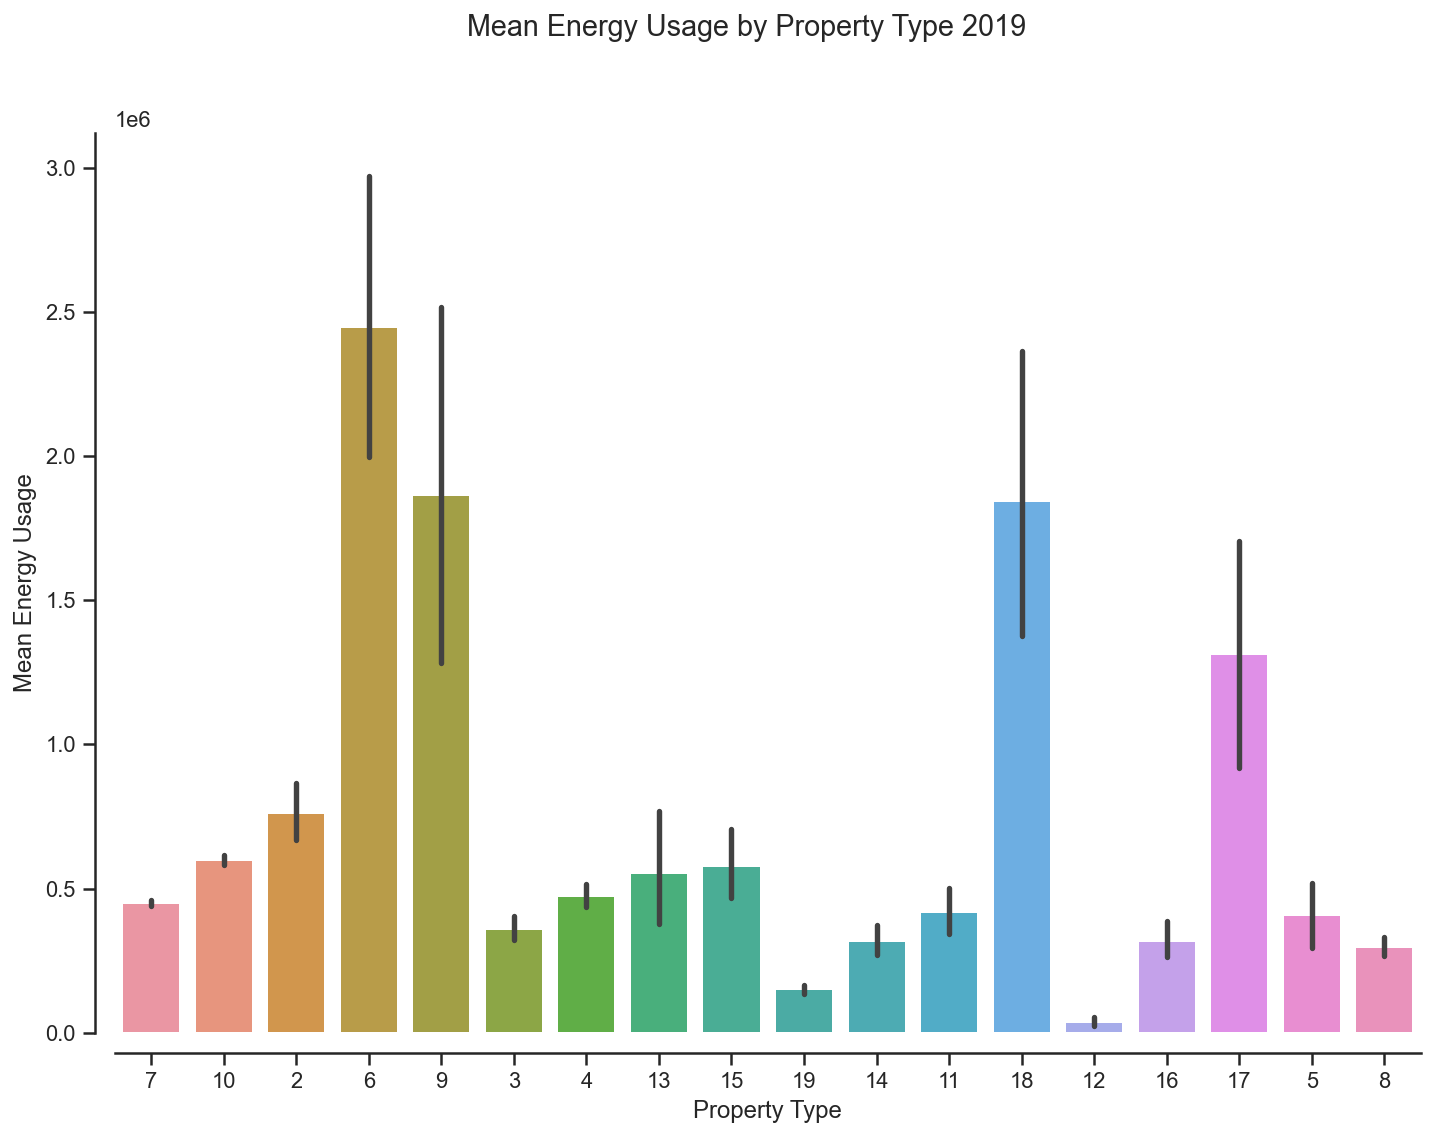

In [61]:
#Graphical depicts the types of facilities using the most energy in 2019.
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
EnergyUse19 = sns.barplot(x="PRIMARYPROPERTYTYPE_SELFSELECT", y= 'KBTU', data=fnonulls2019, ax=ax)
ax.set_xlabel('Property Type')
ax.set_ylabel('Mean Energy Usage')
#ax.set_xticks(np.arange(0, 91, step=10))
#ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], rotation=45)
ax.grid(False)
fig.suptitle('Mean Energy Usage by Property Type 2019')
sns.despine(offset=10, trim=False)

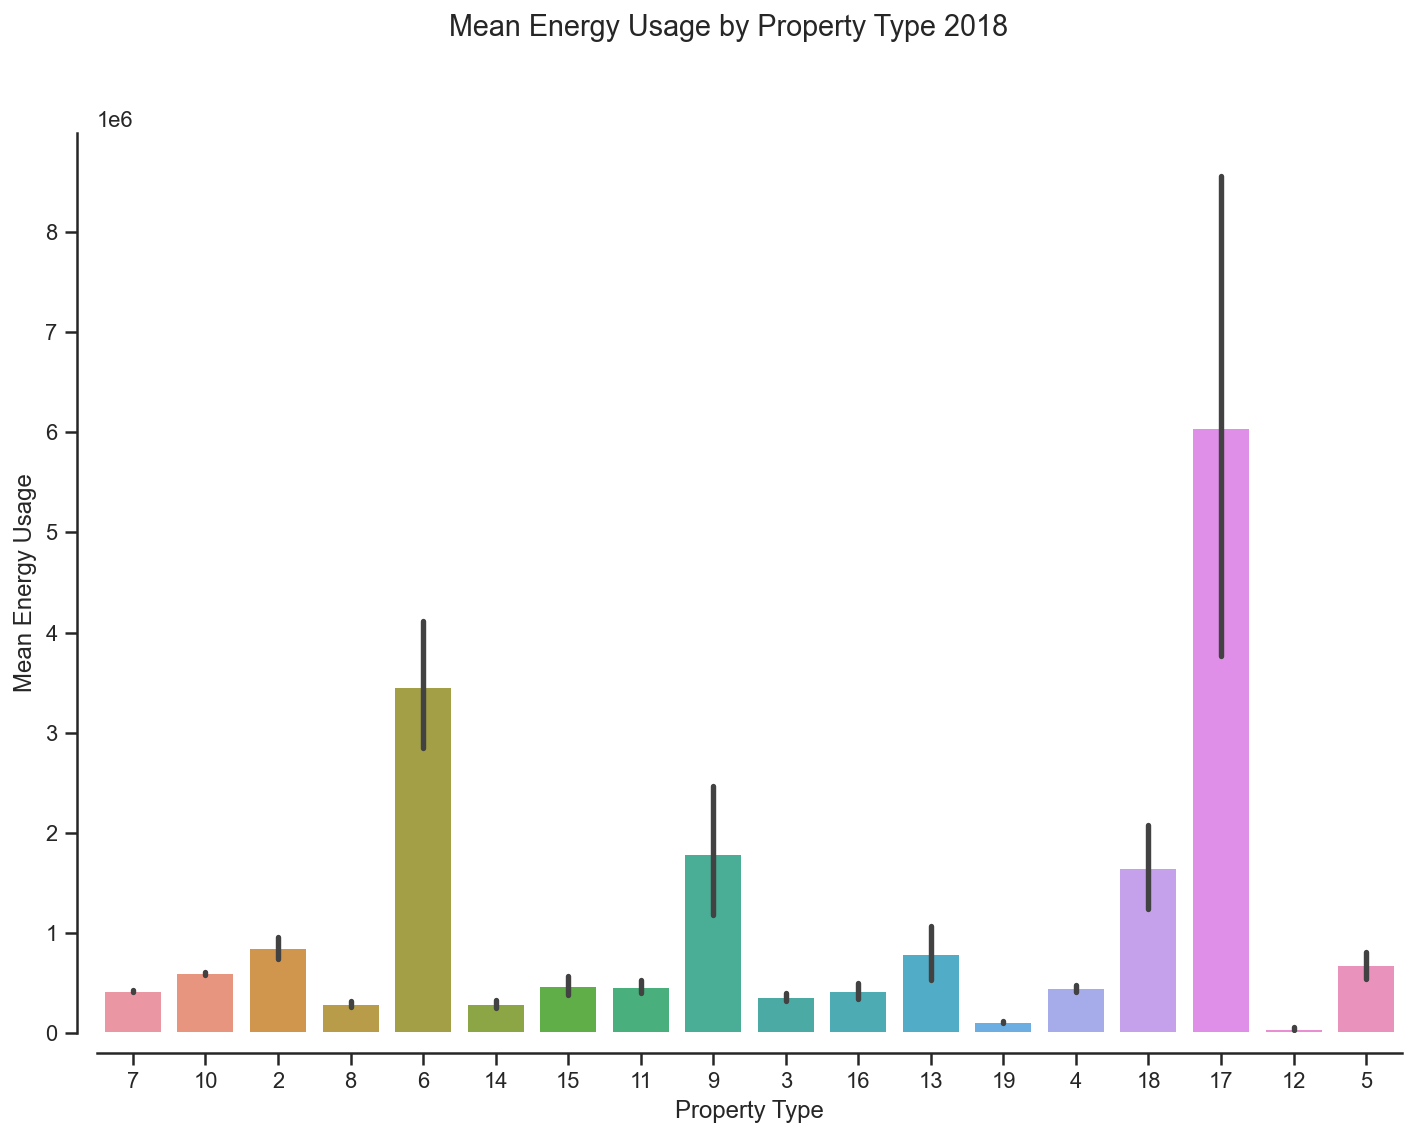

In [62]:
#Graphical depicts the types of facilities using the most energy in 2018.
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
EnergyUse19 = sns.barplot(x="PRIMARYPROPERTYTYPE_SELFSELECT", y= 'KBTU', data=fnonulls2018, ax=ax)
ax.set_xlabel('Property Type')
ax.set_ylabel('Mean Energy Usage')
#ax.set_xticks(np.arange(0, 91, step=10))
#ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], rotation=45)
ax.grid(False)
fig.suptitle('Mean Energy Usage by Property Type 2018')
sns.despine(offset=10, trim=False)
#There must be an outlier in property type 17, likely a data center.